In [1]:
import pandas as pd

In [4]:
resdf = pd.read_table('../examples/fsx1/result.m8', header = None)

In [5]:
print(resdf)

                                                   0                      1   \
0       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-Q6D2F3-F1-model_v4   
1       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-B1JJ32-F1-model_v4   
2       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-A4TIM6-F1-model_v4   
3       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-A7FHH6-F1-model_v4   
4       prots_8_WP_007110832.1_assembly.593500_52.pdb  AF-Q5XIZ9-F1-model_v4   
...                                               ...                    ...   
152217  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-Q6H434-F1-model_v4   
152218  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-P46974-F1-model_v4   
152219  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-Q08201-F1-model_v4   
152220  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-P23174-F1-model_v4   
152221  prots_8_WP_007110832.1_assembly.593500_18.pdb  AF-Q4WSI1-F1-model_v4   

           2    3    4   5   6    7    

In [6]:
resdf = resdf[resdf[10]< 10**-3]
resdf['uniprot_id'] = resdf[1].map( lambda x: x.split('-')[1])
print(resdf)

                                                     0                      1  \
175     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-Q58793-F1-model_v4   
178     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-O94553-F1-model_v4   
182     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-P55266-F1-model_v4   
183     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-P76066-F1-model_v4   
185     prots_0_WP_174701778.1_assembly.1860500_42.pdb  AF-Q99MU3-F1-model_v4   
...                                                ...                    ...   
151850   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q2YWB1-F1-model_v4   
151851   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q2FV74-F1-model_v4   
151852   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q99R88-F1-model_v4   
151853   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q6G6C6-F1-model_v4   
151854   prots_8_WP_007110832.1_assembly.593500_56.pdb  AF-Q7A3F4-F1-model_v4   

            2    3    4  5 

204
{'prots_0_WP_174701778.1_assembly.1860500_42.pdb': 0, 'prots_ELY83688.1_assembly.213000_58.pdb': 1, 'prots_0_WP_179268568.1_assembly.2078500_129.pdb': 2, 'prots_0_WP_179268568.1_assembly.2078500_29.pdb': 3, 'prots_8_WP_007110832.1_assembly.593500_68.pdb': 4, 'prots_WP_058826362.1_assembly.93069_4.pdb': 5, 'prots_0_ELY83688.1_assembly.213000_17.pdb': 6, 'prots_8_WP_007110832.1_assembly.593500_63.pdb': 7, 'prots_0_WP_174701778.1_assembly.1860500_4.pdb': 8, 'prots_0_WP_179268568.1_assembly.2078500_83.pdb': 9, 'prots_0_ELY83688.1_assembly.213000_80.pdb': 10, 'prots_0_WP_179268568.1_assembly.2078500_126.pdb': 11, 'prots_WP_174701778.1_assembly.1860500_14.pdb': 12, 'prots_0_WP_179268568.1_assembly.2078500_10.pdb': 13, 'prots_0_AJF63093.1_assembly.780500_8.pdb': 14, 'prots_0_ELY83688.1_assembly.213000_40.pdb': 15, 'prots_WP_174701778.1_assembly.1860500_53.pdb': 16, 'prots_0_ELY83688.1_assembly.213000_2.pdb': 17, 'prots_8_WP_007110832.1_assembly.593500_19.pdb': 18, 'prots_0_WP_174701778.1_

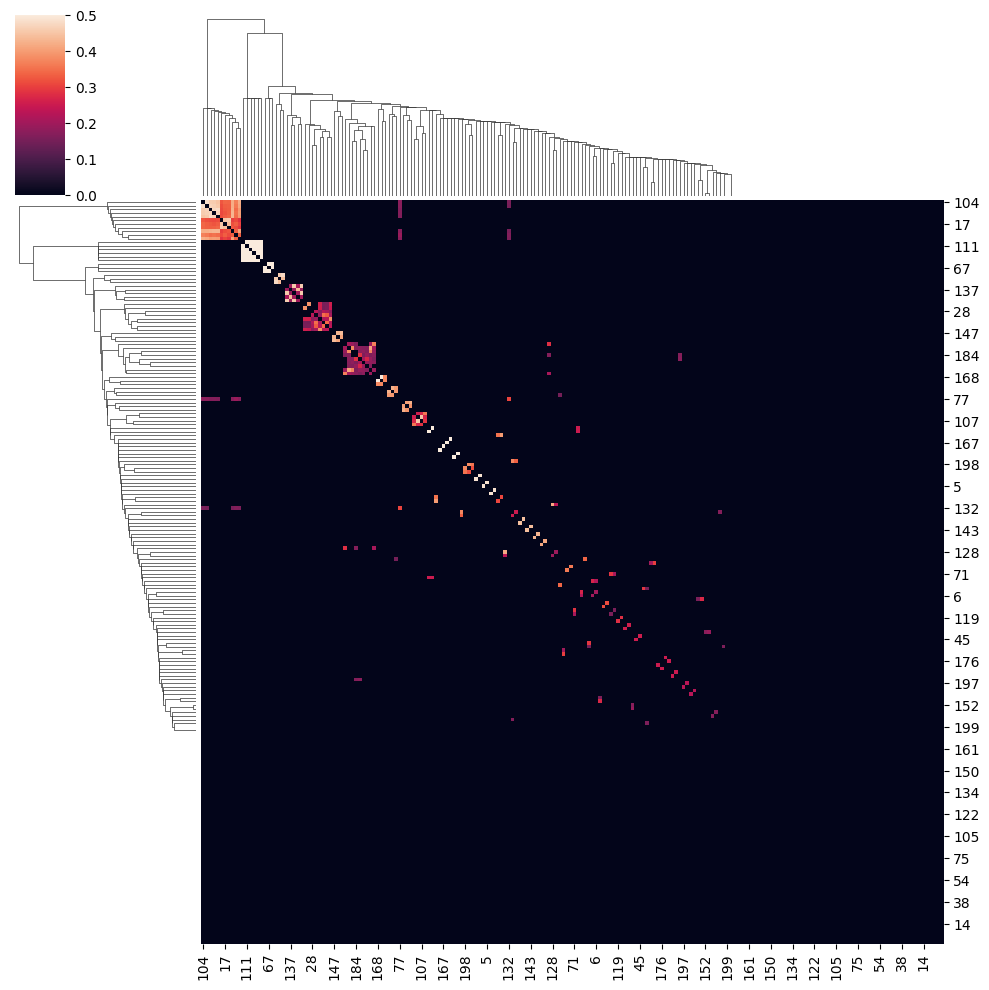

In [14]:
#build a set for each query and perform a jaccard clustering of the queries
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
qsets = {}
for q in resdf[0].unique():
    sub= resdf[resdf[0]==q]
    qsets[q] = set(sub[1])
print(len(qsets))
#use jaccard between sets
qindex = {q:i for i,q in enumerate(qsets)}
distmat = np.zeros((len(qindex),len(qindex)))
print(qindex)
for i,q1 in enumerate(qsets):
    for j,q2 in enumerate(qsets):
        if i > j:
            distmat[qindex[q1], qindex[q2]] = len(qsets[q1].intersection(qsets[q2])) / len(qsets[q1].union(qsets[q2]))


#select clusters for treebuilding
distmat += distmat.T
distmat /= 2

#thresh jaccard
distmat[distmat< .15] = 0
sns.clustermap(distmat)
plt.show()


1 ['prots_ELY83688.1_assembly.213000_58.pdb'
 'prots_8_WP_007110832.1_assembly.593500_19.pdb'
 'prots_0_ELY83688.1_assembly.213000_58.pdb']
4 ['prots_8_WP_007110832.1_assembly.593500_68.pdb'
 'prots_0_ELY83688.1_assembly.213000_17.pdb'
 'prots_ELY83688.1_assembly.213000_17.pdb']
5 ['prots_WP_058826362.1_assembly.93069_4.pdb'
 'prots_0_WP_058826362.1_assembly.93069_4.pdb']
6 ['prots_8_WP_007110832.1_assembly.593500_63.pdb'
 'prots_0_ELY83688.1_assembly.213000_12.pdb'
 'prots_WP_174701778.1_assembly.1860500_8.pdb'
 'prots_0_WP_174701778.1_assembly.1860500_8.pdb'
 'prots_0_WP_179268568.1_assembly.2078500_36.pdb'
 'prots_ELY83688.1_assembly.213000_12.pdb']
7 ['prots_0_WP_174701778.1_assembly.1860500_4.pdb'
 'prots_WP_174701778.1_assembly.1860500_4.pdb']
9 ['prots_0_ELY83688.1_assembly.213000_80.pdb'
 'prots_ELY83688.1_assembly.213000_80.pdb'
 'prots_8_WP_007110832.1_assembly.593500_41.pdb']
11 ['prots_WP_174701778.1_assembly.1860500_14.pdb'
 'prots_4_WP_163487151.1_assembly.2827000_18.pdb'

<Axes: ylabel='Count'>

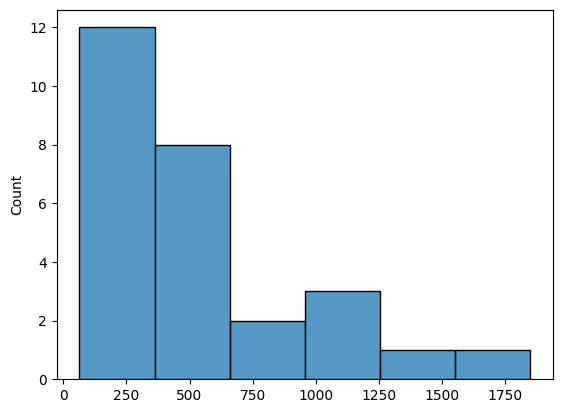

In [21]:
import os

family_folder = '../examples/fsx1/foldtree_searchres/'
#find connected somponents
qindex_rev = dict(zip(qindex.values(), qindex.keys()))
Graph = nx.from_numpy_array(distmat)
if os.path.isdir( family_folder ) == False:
    os.mkdir(family_folder)

famcount = 0
treesizes = []
for i,s in enumerate(nx.connected_components(Graph)):
    if len(s)>1:
        #print(s)
        queries = [qindex_rev[i] for i in s]
        sub=resdf[resdf[0].isin(queries)]
        print(i,sub[0].unique())
        #print(sub, sub[0].unique())
        #output a csv, identifier list in a folder for each fam to setup the snake tree problem
        if len(sub) >100:
            treesizes.append(len(sub.uniprot_id.unique()))
            folder = family_folder + str(famcount) + '/'
            struct_folder = folder + 'structs/'
            if os.path.isdir( folder ) == False: 
                os.mkdir(folder)
            if os.path.isdir( struct_folder ) == False: 
                os.mkdir(struct_folder)
            idlist = ''.join([ i + '\n' for i in sub.uniprot_id])
            with open(folder + 'identifiers.txt' , 'w' ) as idout:
                idout.write(idlist)

            #for filename in sub[0].unique():
            #    with open( './struct_queries/'+filename) as structin:
            #        with open(struct_folder+filename, 'w') as structout:
            #            structout.write(structin.read())
            famcount +=1
        #add models into the structs folder
sns.histplot(treesizes)


In [15]:
#run foldtree on each folder and then continue here

In [16]:
import glob
import toytree
import os
import pandas as pd

folder = '../examples/fsx1/foldtree_searchres/*'
folders = glob.glob(folder)
print(folders)

import toytree
import toyplot


def standard_treedraw( tre, sizes= None , colors= None ,fixed_order=None, fixed_position=None , ts = None,  save_file = False  , tiplabels = None):
	if tiplabels is None:
		tiplabels = tre.get_tip_labels()
	canvas, axes, mark = tre.draw(  
        height=4000,
		ts = ts,
		node_sizes=sizes,
		node_colors=colors,
		tip_labels_align=True,
		scalebar=True,
		fixed_order=fixed_order, 
		fixed_position=fixed_position,
		tip_labels=tiplabels,
		tip_labels_style={
			"fill": "#262626",
			"font-size": "9px"}
	)
	if save_file:
		toyplot.svg.render(canvas, save_file)


['foldtree_searchres/34', 'foldtree_searchres/2.zip', 'foldtree_searchres/37', 'foldtree_searchres/0.zip', 'foldtree_searchres/logs', 'foldtree_searchres/5.zip', 'foldtree_searchres/7', 'foldtree_searchres/8.zip', 'foldtree_searchres/20.zip', 'foldtree_searchres/51', 'foldtree_searchres/21.zip', 'foldtree_searchres/21', 'foldtree_searchres/22.zip', 'foldtree_searchres/23.zip', 'foldtree_searchres/24', 'foldtree_searchres/27', 'foldtree_searchres/43', 'foldtree_searchres/6', 'foldtree_searchres/3', 'foldtree_searchres/46', 'foldtree_searchres/41', 'foldtree_searchres/11', 'foldtree_searchres/49', 'foldtree_searchres/19', 'foldtree_searchres/14', 'foldtree_searchres/17', 'foldtree_searchres/30.zip', 'foldtree_searchres/33', 'foldtree_searchres/5', 'foldtree_searchres/31.zip', 'foldtree_searchres/2', 'foldtree_searchres/1.zip', 'foldtree_searchres/32.zip', 'foldtree_searchres/36', 'foldtree_searchres/31', 'foldtree_searchres/39', 'foldtree_searchres/4.zip', 'foldtree_searchres/7.zip', 'fo

In [ ]:
for i,f in enumerate(folders):
    if os.path.isdir(f) is True:
        print(f)
        contents = glob.glob(f+'/*')
        print(contents)
    if f+'/struct_tree.nwk.PP.nwk.rooted' in contents:
        t = toytree.tree(f+'/struct_tree.nwk.PP.nwk.rooted')
        seqdf = pd.read_csv(f+'/sequence_dataset.csv')
        taxdict = dict(zip(seqdf['query'],seqdf['Organism'] ))
        labels = [ l + taxdict[l] if l in taxdict else l for l in t.get_tip_labels()  ]
        standard_treedraw( t, sizes= None , colors= None ,fixed_order=None, fixed_position=None , ts = None,  save_file = False  , tiplabels = labels)
        

foldtree_searchres/34
['foldtree_searchres/34/identifiers.txt', 'foldtree_searchres/34/structs']
foldtree_searchres/37
['foldtree_searchres/37/identifiers.txt', 'foldtree_searchres/37/structs']
foldtree_searchres/logs
['foldtree_searchres/logs/foldseek2tab', 'foldtree_searchres/logs/foldseekdb', 'foldtree_searchres/logs/mad_root_struct', 'foldtree_searchres/logs/postprocess', 'foldtree_searchres/logs/fasttree', 'foldtree_searchres/logs/dl_ids_structs', 'foldtree_searchres/logs/clustalo', 'foldtree_searchres/logs/plddt', 'foldtree_searchres/logs/fastme', 'foldtree_searchres/logs/foldseek_allvall', 'foldtree_searchres/logs/dl_ids_sequences', 'foldtree_searchres/logs/foldseek2distmat']
foldtree_searchres/7
['foldtree_searchres/7/logs', 'foldtree_searchres/7/identifiers.txt', 'foldtree_searchres/7/structs']
foldtree_searchres/51
['foldtree_searchres/51/identifiers.txt', 'foldtree_searchres/51/structs']
foldtree_searchres/21
['foldtree_searchres/21/aln.18', 'foldtree_searchres/21/structblob

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="taf452556a51745b09fda6f3eef8b055c"> A0A7V9LVG4Geodermatophilaceae bacterium A0A255EPF0Parenemella sanctibonifatiensis A0A399JCM2Galactobacter valiniphilus A0A7K0YV60Actinomycetia bacterium A0A7W9P137Actinoalloteichus hymeniacidonis A0A062WQ00Frankia sp. BMG5.23 W9CWF7Frankia sp. CcI6 A0A7I0DGD9Cryobacterium sp. Sr3 A0A5R1NN67Cryobacterium sp. TMT3-29-2 A0A376EHD7Dermatophilus congolensis A0A6L9SVG2Bifidobacterium platyrrhinorum A0A1C4H051Bifidobacterium commune A0A4S4FD94Bifidobacterium pseudolongum A0A2A2ECQ2Bifidobacterium criceti A0A3D0N986Armatimonadetes bacterium A0A7G5LSP1Mumia sp. ZJ1417 A0A6J4MMZ4uncultured Nocardioidaceae bacterium A0A7J9XES7Streptosporangiales bacterium A0A852W3E2Pseudonocardia antarctica A0A543B1L3Stackebrandtia endophytica A0A3M1CNY3Deltaproteobacteria bacterium A0A6I3EVT4Actinomycetia bacterium A0A1F0QXP3Rothia sp. HMSC066G07 A0A1E9MD02Rothia sp. HMSC069D01 A0A1F1EY16Rothia sp. HMSC073B08 A0A644SRE0bioreactor metagenome A0A7W8FGF8Desulfovibrio intestinalis A0A2V9YKH4Acidobacteria bacterium A0A3M2ELX5Zetaproteobacteria bacterium A0A5S3XHT2Pseudoalteromonas sp. S1688 A0A290TCK6Pseudoalteromonas tetraodonis A0A7Y8QHX0Pseudoalteromonas sp. Scap03 N6V5N7Pseudoalteromonas agarivorans S816 A0A4Q6JAN9Pseudoalteromonas sp. MEBiC 03485 A0A7Y2P6B5Pseudoalteromonas sp. NEC-BIFX-2020_002 A0A2A4PQN8Gammaproteobacteria bacterium A0A3N4WWS1Frederiksenia canicola A0A315BLF0Limnohabitans sp. MMS-10A-192 A0A318SJ26Xylophilus ampelinus A0A840LHY9Paucibacter oligotrophus A0A2D2LVS1Moraxella osloensis A0A1B8Q399Moraxella osloensis A0A2A2Y325Opitutae bacterium AMD-G3 A0A3L7TTS3Planctomycetes bacterium A0A3L7R853Planctomycetes bacterium A0A7X0H5V8Algisphaera agarilytica A0A3D2UFS2Gemmatimonadetes bacterium A0A1Z9KNA2bacterium TMED181 A0A2S0MDY5Ottowia oryzae A0A4S2H878Marinicauda pacifica A0A363NK32Sphingobacterium athyrii A0A420VWQ9Sphingobacterium puteale A0A653YNB2Sphingobacterium multivorum A0A4U9K3N5Sphingobacterium daejeonense A0A5Q0Q9H4Sphingobacterium sp. dk4302 A0A519WV61Pedobacter sp A0A0T5VQM1Pedobacter ginsenosidimutans A0A5C8DIV2Chitinophagaceae bacterium A0A4Q5U7J3Chitinophagaceae bacterium A0A7C4UD58Bacteroidia bacterium A0A832BJ69Chitinophagaceae bacterium A0A3C1C9W0Chitinophagaceae bacterium A0A5P2GIA6Empedobacter brevis A0A348XZC7Flavobacteriaceae bacterium A0A3C1A7H6Bacteroidales bacterium A0A7X8KGE3Bacteroidales bacterium A0A136L9L9Bacteroidetes bacterium OLB8 A0A1I7F1A0Porphyromonadaceae bacterium KHP3R9 A0A239R3H7Prevotellaceae bacterium MN60 A0A849NAM2Ignavibacteriae bacterium A0A836X6U1Candidatus Handelsmanbacteria bacterium M5VPW9Leptospira sp. Fiocruz LV4135 M6AQZ7Leptospira sp. P2653 M6F1Z0Leptospira kirschneri serovar Bulgarica str. Nikolaevo A0A1D7UX96Leptospira tipperaryensis A0A7I0HRE3Leptospira bouyouniensis A0A0P7K0V3Apilactobacillus kunkeei A0A0M9D4N1Apilactobacillus apinorum A0A7X2XTA6Secundilactobacillus folii A0A0R1URU7Levilactobacillus hammesii DSM 16381 A0A0K8MIP0Fructobacillus ficulneus A0A2D9GPE8Chloroflexi bacterium N1Z903Clostridium sp. MD294 A0A2D7AP13Pelagibacterales bacterium A0A7W1N932Planctomycetes bacterium A0A535LPL7Chloroflexi bacterium A0A315R0R2Halanaerobium sp A0A1G6MB39Halanaerobium congolense E3DLN1Halanaerobium praevalens (strain ATCC 33744 / DSM 2228 / GSL) A0A8A7KFK6Iocasia fonsfrigidae A0A1Q6JV55Clostridium sp. 26_21 A0A3D4DG09Clostridiales bacterium R6Q220Clostridium sp. CAG:508 A0A6L3V2T7Cytobacillus depressus A0A372LL01Peribacillus saganii A0A7T5ERA4Alicyc

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2da097ecddb44b66accf574663175fb9"> A0A435KDG3Mesorhizobium sp. M7A.F.Ca.CA.001.05.1.1 A0A3S2AGM7Mesorhizobium sp. M7A.F.Ca.US.001.01.1.1 A0A3S2I3H4Mesorhizobium sp. M7A.F.Ca.AU.002.02.1.1 A0A435YM46Mesorhizobium sp. M7D.F.Ca.US.004.03.1.1 A0A3S1CZG2Mesorhizobium sp. M7A.T.Ca.TU.009.01.3.2 A0A3S1RB17Mesorhizobium sp. M7A.F.Ca.CA.001.13.2.1 A0A8B5TT96Mesorhizobium sp. B2-3-15 A0A503DP81Mesorhizobium sp. B2-5-7 A0A440HDV2Mesorhizobium sp A0A1A5ID64Rhizobium loti (Mesorhizobium loti) A0A547LR08Mesorhizobium sp. WSM4315 A0A7R6YP68Mesorhizobium sp. 131-3-5 A0A4R9VZ48Mesorhizobium sp. M2E.F.Ca.ET.219.01.1.1 A0A442B9P9Mesorhizobium sp A0A442GW85Mesorhizobium sp A0A090G2Y5Mesorhizobium plurifarium A0A439H6K8Mesorhizobium sp A0A528XJ15Mesorhizobium sp A0A4S1FRI9Mesorhizobium sp. M4B.F.Ca.ET.143.01.1.1 A0A562MQ57Mesorhizobium tianshanense A0A0Q7UUP1Mesorhizobium sp. Root552 A0A7W9VTX4Aquamicrobium lusatiense C6AR68Rhizobium leguminosarum bv. trifolii (strain WSM1325) A0A3S3ZUH1Rhizobium leguminosarum A0A3S0QAP3Rhizobium anhuiense A0A246DQD6Rhizobium esperanzae A0A0B4X0X5Rhizobium gallicum bv. gallicum R602sp A0A559SR99Rhizobium mongolense USDA 1844 J2J0L4Rhizobium sp. CF122 A0A2T3EL70Rhizobium sp. JAB6 A0A4T3FC97Rhizobium sp. P44RR-XXIV A0A4V2TQF8Neorhizobium sp. JUb45 A0A1N6NXM7Rhizobium sp. RU35A A0A844AQB8Rhizobium fredii (Sinorhizobium fredii) C3MHM6Sinorhizobium fredii (strain NBRC 101917 / NGR234) A0A376AL22Ciceribacter selenitireducens ATCC BAA-1503 A0A7Z7PR11Ciceribacter naphthalenivorans A0A292E6E0Rhizobium sp. ACO-34A A0A504U721Rhizobium glycinendophyticum A0A7X1HB94Rhizobium sp. AQ_MP A0A4S8P5L9Peteryoungia ipomoeae A0A506UD39Martelella alba A0A212LDL9uncultured Pleomorphomonas sp A0A011ULI8Brucella anthropi (Ochrobactrum anthropi) A0A502BQ29Brucella gallinifaecis Q2YMJ7Brucella abortus (strain 2308) A0A1U9JW16Candidatus Tokpelaia hoelldoblerii A0A2S9JDT8Phyllobacterium myrsinacearum J1JRT8Bartonella vinsonii subsp. arupensis OK-94-513 X5M3N0Bartonella henselae (Rochalimaea henselae) W3U043Bartonella quintana JK 73 A0A0V7YYZ6Methylobacterium sp. GXS13 A0A1I3K520Methylobacterium brachiatum A0A6B9FS01Methylobacterium mesophilicum SR1.6/6 A0A0Q4ZR42Methylobacterium sp. Leaf104 A0A512IXI1Methylobacterium oxalidis A0A5C8U4W0Methylobacterium sp. WL9 A0A5P9JSN8Microvirga thermotolerans A0A1B2ED12Microvirga ossetica A0A542BBU1Bosea sp. AK1 A0A1I3DZV2Methylobacterium brachiatum A0A5E4NY82Beijerinckiaceae bacterium RH AL1 A0A653XC49Bosea sp. 62 A0A653LPH6Bosea sp. 62 A0A011UC20Aquamicrobium defluvii A0A0P7X917Saliniramus fredricksonii A0A5P8MZP1Ancylobacter sp. TS-1 D7A3Q2Starkeya novella (strain ATCC 8093 / DSM 506 / JCM 20403 / CCM 1077 / IAM 12100 / NBRC 12443 / NCIMB 10456) A0A2W5R1B6Starkeya novella (Thiobacillus novellus) A0A4V2UYC1Aquabacter spiritensis A0A258IHE9Rhizobiales bacterium 32-66-11 A0A165NBQ5Pseudovibrio sp. W74 A0A0A1P7E9bacterium YEK0313 A0A2S5M7G9Hyphomicrobium sp A0A218PTR7Hyphomicrobium sp. GJ21 A0A2A4P828Hyphomicrobiales bacterium A0A1G6C7K0Bauldia litoralis A0A2Z4UFH4Rhodobiaceae bacterium A0A2N3C368Alphaproteobacteria bacterium HGW-Alphaproteobacteria-3 A0A1G7CUG5Bradyrhizobium brasilense A0A1R1QLL2Bradyrhizobium sp. UFLA 03-321 A0A7S9GV62Bradyrhizobium genosp. L A0A1I3NQN3Bradyrhizobium sp. cf659 A0A151FV49Bradyrhizobium liaoningense A5EE98Bradyrhizobium sp. (strain BTAi1 / ATCC BAA-1182) Q3SPD1Nitrobacter winogradskyi (strain ATCC 25391 / DSM 10237 / CIP 104748 / NCIMB 11846 / Nb-255) A0A4Q7G0Y2Bradyrhiz

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tedf9005ad06c451fab5b7d7be2b954b2"> A0A015YN06Bacteroides fragilis str. 2-F-2 #4 A0A1Q6I9K4Bacteroides uniformis A0A3A6C5Z7Bacteroides sp. AF15-14LB A0A413VR89Bacteroides nordii K1GM33Bacteroides fragilis HMW 615 A0A6A2JE21Bacteroides stercoris A0A1Y4V7P5Bacteroides xylanisolvens A0A3D2LZ58Bacteroides ovatus A0A1H4FIK9Bacteroides xylanisolvens A0A414JSS9Bacteroides uniformis A0A7J5P3P4Bacteroides xylanisolvens A0A5P3APP4Phocaeicola vulgatus (Bacteroides vulgatus) A0A1Y3WV63Alistipes sp. An54 R5X4L8Alistipes sp. CAG:157 A0A015WXV6Bacteroides fragilis str. DS-208 I9QWJ9Phocaeicola dorei CL03T12C01 A0A413GSE1Phocaeicola dorei A0A1Q6GXF7Bacteroides sp. 43_108 A0A496DIP4Parabacteroides sp. OF04-13BH A0A3A5Y9M1Bacteroides sp. AF25-17LB K1UDF4human gut metagenome A0A5P3AT15Phocaeicola vulgatus (Bacteroides vulgatus) A0A412T7F4Bacteroides stercoris A7ABG4Parabacteroides merdae ATCC 43184 D4VBK5Phocaeicola vulgatus PC510 A0A3E4KD08Phocaeicola vulgatus (Bacteroides vulgatus) R6YCQ2Alistipes sp. CAG:435 A0A1T5IWM3Bacteroidales bacterium WCE2008 A0A414WQH6Bacteroides ovatus A0A5M5D5C0Bacteroides ovatus A0A4R4GJ33Phocaeicola dorei A0A1H7V172Duganella sp. CF402 A0A845U8Y1Acidithiobacillus ferrianus A0A1X0WZ20Streptococcus oralis subsp. tigurinus A0A1X1HYU6Streptococcus oralis subsp. oralis E3CSF2Streptococcus vestibularis F0396 A0A1S1FCU6Streptococcus sp. HMSC034B03 A0A2V4V871Paenibacillus barcinonensis A0A2Z2KEQ6Paenibacillus donghaensis A0A396P4W2Blautia sp. TM10-2 A0A0D1PN59Bacillus thuringiensis Sbt003 C3DZR2Bacillus thuringiensis serovar pakistani str. T13001 A0A4U7JBR9Ruminiclostridium herbifermentans A0A157QLQ4Bordetella ansorpii A0A286K5K6Vibrio parahaemolyticus A0A446ZIY7Acinetobacter calcoaceticus A0A2M9GCQ0Pseudomonas sp. S10E 269 A0A2T5LGF1Luteibacter sp. OK325 A0A742KXZ4Salmonella enterica (Salmonella choleraesuis) A0A3Y0DAJ8Salmonella enterica I A0A379CZ86Pluralibacter gergoviae (Enterobacter gergoviae) A0A291PN88Acetobacter tropicalis A0A5E6MTW9Pseudomonas fluorescens S6TUT2Pseudomonas syringae pv. actinidiae ICMP 18807 A0A3E2U411Faecalibacterium prausnitzii A0A173TS41[Eubacterium] rectale A0A0E3PXG6Methanosarcina mazei WWM610 A0A0E3WPY3Methanosarcina mazei C16 A0A0F8G3Y2Methanosarcina mazei (Methanosarcina frisia) A0A0E3PLD0Methanosarcina siciliae C2J Q46FY2Methanosarcina barkeri (strain Fusaro / DSM 804) A0A0E3QJ67Methanosarcina barkeri str. Wiesmoor A0A498GVZ2Methanosarcina sp. MSH10X1 A0A0E3QKG9Methanosarcina barkeri str. Wiesmoor A0A6B3FV95Streptomyces sp. SID7982 A0A841FNT3Phytomonospora endophytica A0A1R0G5N6Pseudomonas sp. ATCC PTA-122608 A0A3M6FJQ4Pseudomonas amygdali pv. sesami (Pseudomonas syringae pv. sesami) A0A7Y0YXQ6Pseudomonas sp. WS 5413 A0A193SGI9Pseudomonas cerasi A0A522GBD2Burkholderiaceae bacterium A0A3M5K2H6Pseudomonas savastanoi (Pseudomonas syringae pv. savastanoi) A0A7V8S083Pseudomonas syringae pv. broussonetiae A0A127I6T3Pseudomonas azotoformans A0A2G2FSV3Robiginitomaculum sp A0A7Y4BWI4Vibrio crassostreae A0A4V2EH89Vibrio vulnificus A4Y1T2Shewanella putrefaciens (strain CN-32 / ATCC BAA-453) A0A0F9WCX8marine sediment metagenome A0A522GB77Burkholderiaceae bacterium X1MSL1marine sediment metagenome D4YEY8Aerococcus viridans (strain ATCC 11563 / DSM 20340 / CCUG 4311 / JCM 20461 / NBRC 12219 / NCTC 8251 / M1) I4CBD2Desulfomonile tiedjei (strain ATCC 49306 / DSM 6799 / DCB-1) A0A0S2HWT1Salinivirga cyanobacteriivorans A0A2X2JCS7Sphingobacterium multivorum A0A2T1N697Mesoflavibacter zeaxanthinifaciens su

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t8b9e33b0527c4cbdbaf19b1544aa9b09"> A0A1C6IBH6uncultured Clostridium sp B9Y5S8Holdemania filiformis DSM 12042 A0A2A6ZKT7Faecalibacterium prausnitzii A0A2U1C1C9Intestinimonas butyriciproducens A0A1Y4HMM4Anaeromassilibacillus sp. An200 A0A1Y3SFM6Flavonifractor sp. An82 A0A417TEV9Ruminococcus sp. OM05-10BH A0A1Y4AVQ2Eubacterium sp. An3 A0A5M8C2A7Clostridium symbiosum (Bacteroides symbiosus) A0A1Y3U0Y6Anaerotignum lactatifermentans A0A1I1ZZU0Peptostreptococcus sp. D1 A0A3A8YH13bacterium 1xD42-67 A0A810PTS4Vescimonas fastidiosa C0FPK9Roseburia inulinivorans DSM 16841 A0A810Q011Vescimonas fastidiosa A0A7X1IB40Bittarella massiliensis A0A417GQC0Butyricicoccus sp. AM29-23AC A0A2N0UWE0Ruminococcus bromii A0A4D7AT58Dysosmobacter welbionis A0A3A6D720Erysipelotrichaceae bacterium AF15-26LB R9M5Y8Oscillibacter sp. 1-3 R9LV53Oscillibacter sp. 1-3 A0A6G3M346Pseudoflavonifractor sp. 60 A0A1Y3RQD9Flavonifractor sp. An91 A0A3A8YJD7bacterium 1xD42-67 A0A1C6F1J2uncultured Clostridium sp A0A844EHV5Faecalibacterium sp. BIOML-A3 A0A416PAY0Butyricicoccus sp. AF22-28AC A0A174CD35Faecalibacterium prausnitzii A0A4R1R2M1Fournierella massiliensis D1PJV5Subdoligranulum variabile DSM 15176 A0A4D7B1X6Dysosmobacter welbionis A0A372SVZ5Absiella sp. AM09-45 D4JXQ4Faecalibacterium prausnitzii L2-6 K0Y309Lachnoanaerobaculum sp. OBRC5-5 A0A6N9K4P5Coprococcus sp. BIOML-A2 A0A416JR72Lachnospiraceae bacterium AM48-27BH A0A1C6D4R6uncultured Clostridium sp A0A2A7A8Z9Faecalibacterium prausnitzii A0A810Q581Vescimonas fastidiosa F4XER1Ruminococcaceae bacterium D16 D4CBX2Clostridium sp. M62/1 A0A3A6EIA9Lachnospiraceae bacterium AM40-2BH A0A1C6BW89uncultured Clostridium sp A0A1C6B3S5uncultured Flavonifractor sp A0A1Q6KQ08Clostridiales bacterium 52_15 W1I6Y1uncultured bacterium R6TUY6Firmicutes bacterium CAG:272 A0A845RB15Colidextribacter sp. OB.20 A0A6N9PBN4Clostridiaceae bacterium A0A1C6I1D0uncultured Flavonifractor sp A0A4D7ANS0Dysosmobacter welbionis A0A6I2R3Y5Flavonifractor plautii (Fusobacterium plautii) A0A417ISQ7Butyricicoccus sp. AM27-36 A0A1Q6JQD2Clostridiales bacterium 59_14 A0A3D4D9I6Oscillibacter sp A0A3E2XXI8Agathobaculum butyriciproducens A0A3D3XZJ4Oscillospiraceae bacterium K1T3J9human gut metagenome A0A1Q6JHX6Clostridiales bacterium 59_14 A0A1Y4LTW0Butyricicoccus pullicaecorum A0A1Y4EY05Anaeromassilibacillus sp. An250 A0A1Y4RHT2Flavonifractor sp. An135 A7VTC4[Clostridium] leptum DSM 753 A0A1Z2XSJ9Acutalibacter muris A0A1C7GVF1Hungateiclostridiaceae bacterium KB18 A0A6N9PTV3Neglectibacter sp. 59 A0A350TVI7Tyzzerella sp A0A7G8TE10Caproicibacter fermentans A0A3R6SZS2Clostridiaceae bacterium AF18-31LB A0A173U4W5Dorea longicatena A0A373CC24Clostridiaceae bacterium AF02-42 A0A3R6G275Roseburia intestinalis A0A844E3V7Eubacterium ramulus R0CTW0[Clostridium] clostridioforme 90A6 A0A413JGM8Clostridium symbiosum (Bacteroides symbiosus) A0A1I3J1T8Ruminococcaceae bacterium D5 A0A2A7B5F9Faecalibacterium prausnitzii A0A367GJ57Subdoligranulum sp. APC924/74 A0A5S4VQW9[Eubacterium] rectale A0A3E2U4G1Faecalibacterium prausnitzii A0A329TYZ6Faecalibacterium prausnitzii A0A373NZI2Faecalibacterium sp. OF04-11AC A0A173T7K8Faecalibacterium prausnitzii A0A416PCF5Clostridium sp. AF22-10 A0A416S1L5Blautia sp. AF19-13LB A0A412NHB1Ruminococcus gnavus A0A3E4M397[Eubacterium] rectale A0A1C6GCD2uncultured Ruminococcus sp A0A1Y4JG11Faecalibacterium sp. An192 A0A7X2NK03Clostridium porci A0A6N7WI77Eisenbergiella porci A0A1I0D3B7Enterocloster clostridioformis A0A6G3LW56Pseudoflavonifractor sp.

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t38292094187e48979ba2e19b0fad133f"> A0A1C4V370Micromonospora carbonacea A0A1C4Y3D5Micromonospora haikouensis A0A1S8XN69Micromonospora sp. Rc5 F4F5S0Micromonospora maris (strain DSM 45365 / JCM 31040 / NBRC 109089 / NRRL B-24793 / AB-18-032) (Verrucosispora maris) A0A5D0UND6Micromonospora sp. MP36 A0A1C5IJ89Micromonospora echinaurantiaca A0A317JXV6Micromonospora sp. S4605 A0A6I5UN57Micromonospora terminaliae A0A1C4WYC5Micromonospora tulbaghiae A0A385B0Z1Micromonospora sp. B006 A0A3N9WJM8Micromonospora inaquosa A0A328N9C5Micromonospora noduli A0A0M8XLK2Micromonospora sp. NRRL B-16802 A0A846RCA4Micromonospora profundi A0A136PLE8Micromonospora rosaria A0A518WJQ4Micromonospora sp. HM134 A0A246RPN6Micromonospora wenchangensis A0A1H1XVE6Actinoplanes derwentensis A0A239IYA5Actinoplanes regularis A0A3N9WJW5Micromonospora inaquosa A0A3M9KL81Micromonospora aurantiaca A0A841BW94Allocatelliglobosispora scoriae A0A317DI99Micromonospora sp. 4G51 A0A1C3MWK5Micromonospora krabiensis A0A1C4TVZ8Micromonospora matsumotoense A0A1S8XZL9Micromonospora sp. Rc5 A0A2W2D5G8Micromonospora deserti A0A518WC47Micromonospora sp. HM134 A0A1C6SA97Micromonospora nigra A0A4R0G6A1Micromonospora zingiberis A0A6M1L7M6Verrucosispora sioxanthis A0A418MMJ3Micromonospora radicis A0A2P8AYP2Micromonospora sp. MH33 A0A3N9WCZ1Micromonospora inaquosa A0A810MTK5Polymorphospora rubra A0A6V8KRI2Phytohabitans houttuyneae A0A7Z0NTD8Salinispora sp. H7-4 A0A561VSC8Actinoplanes teichomyceticus A0A4Q7ZFA3Krasilnikovia cinnamomea A0A543AS25Stackebrandtia endophytica A0A543CX56Pseudonocardia kunmingensis A0A1G6VNV8Actinokineospora iranica W7TFF9Kutzneria sp. 744 K0JPX6Saccharothrix espanaensis (strain ATCC 51144 / DSM 44229 / JCM 9112 / NBRC 15066 / NRRL 15764) A0A495X9T2Saccharothrix variisporea A0A1M5MBU4Streptoalloteichus hindustanus A0A1I1YSV7Actinopolyspora alba A0A1H0X0G0Actinopolyspora xinjiangensis A0A099D393Actinopolyspora erythraea A0A839DWS2Halosaccharopolyspora lacisalsi A0A7J9XPC6Pseudonocardiaceae bacterium A0A1T3P5D6Embleya scabrispora A0A223S037Nocardiopsis gilva YIM 90087 A0A853DIB6Allobranchiibius huperziae A0A2P8DF29Haloactinopolyspora alba A0A0Q5NRE1Arthrobacter sp. Leaf337 A0A2S3ZTA2Arthrobacter glacialis A0A5B0E2Q3Paeniglutamicibacter gangotriensis A0A4S2TD49Streptomyces sp. A1136 A0A2K8P5A2Streptomyces lavendulae subsp. lavendulae A0A1E7LB15Streptomyces nanshensis A0A7Y6CDC2Streptomyces odorifer A0A238WDK3Haloechinothrix alba A0A1X1Z8Q5Mycobacterium nebraskense A0A1A2PT52Mycobacterium sp. E1319 A0A1X2KHA8Mycobacterium vulneris A0A5P9YQP9Nonomuraea nitratireducens A0A7S8MVQ9Microbacterium schleiferi A0A5N0TFD7Microbacterium caowuchunii A0A7M2XX23Rhodococcus pyridinivorans N9LCW0Acinetobacter sp. ANC 4105 A0A3A8ER53Acinetobacter rongchengensis A0A1G6W1F3Psychrobacter pacificensis A0A1Q8DQ95Psychrobacter sp. C 20.9 A0A0J7M622Marinobacter subterrani A0A158FJD4Caballeronia telluris F4G6L6Alicycliphilus denitrificans (strain DSM 14773 / CIP 107495 / K601) A0A3N7FLA3Acidovorax sp. FJL06 A0A858ZTH4Alicycliphilus denitrificans A0A4Q6GHF4Proteobacteria bacterium A0A5S9QTS9BD1-7 clade bacterium A0A6L4AP56Desulfobulbaceae bacterium A0A6N9A7P6Gemmatimonadetes bacterium A0A519PE27Chryseobacterium sp A0A4U1BZ09Pedobacter cryotolerans A0A537HXC4Bacteroidetes bacterium A0A838ZTR1Moheibacter lacus A0A1I7IZQ1Pustulibacterium marinum A0A1T5B8S4Dyadobacter psychrophilus A0A0F9I9D5marine sediment metagenome A0A2E7DPS2Gammaproteobacteria bacterium A0A2E5B7A0Euryarchaeota archaeon A

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta4318b452fec430a99b2a249a1df9d22"> A0A256HI18Halorubrum sp. Hd13 M0E8Z9Halorubrum coriense DSM 10284 A0A256H957Halorubrum sp. Ib24 A0A2G1X7Z9Halorubrum sp. C3 A0A238YRL1Halorubrum ezzemoulense (Halorubrum chaoviator) A0A4U7D3X5Halorubrum sp. ASP121 A0A1I3AJG5Halorubrum aquaticum M0PGJ3Halorubrum kocurii JCM 14978 A0A1X4H870Halorubrum ezzemoulense DSM 17463 A0A256KEA7Halorubrum ezzemoulense (Halorubrum chaoviator) A0A7D4C2W9Halorubrum salinarum A0A6B1IHP1Halorubrum terrestre A0A256IG78Halorubrum sp. Ea1 A0A4U7BZB5Halorubrum sp. CGM4_25_10-8A A0A4U7DUF0Halorubrum sp. GN12_10-3_MGM A0A1X4G9Q2Halorubrum ezzemoulense DSM 17463 A0A256IM77Halorubrum ezzemoulense (Halorubrum chaoviator) M0DC10Halorubrum tebenquichense DSM 14210 A0A256J232Halorubrum ezzemoulense (Halorubrum chaoviator) A0A1X4G982Halorubrum ezzemoulense DSM 17463 M0PRM9Halorubrum arcis JCM 13916 A0A4U7D8J3Halorubrum sp. SP3 A0A498FJS7Halorubrum sp. Atlit-26R A0A4U7E2L1Halorubrum sp. GN12_10-3_MGM A0A4U7DSL2Halorubrum sp. ASP1 A0A256LJ66Halorubrum sp. E3 A0A4U7CCW7Halorubrum sp. CGM4_25_10-8A A0A4U7ELU4Halorubrum sp. GN11_10-6_MGM A0A4U7CE69Halorubrum sp. ARQ200 A0A0M9AL56Halorubrum tropicale A0A256JV15Halorubrum ezzemoulense (Halorubrum chaoviator) A0A2G1WXF6Halorubrum sp. C191 A0A6B1IFV1Halorubrum terrestre M0DQL0Halorubrum terrestre JCM 10247 A0A498F1X2Halorubrum sp. Atlit-28R A0A256IE33Halorubrum halodurans A0A4U7C7V8Halorubrum sp. CGM4_25_10-8A A0A256IQ26Halorubrum ezzemoulense (Halorubrum chaoviator) A0A481RKL2Halorubrum ezzemoulense (Halorubrum chaoviator) A0A410TTD0Halorubrum sp. BOL3-1 A0A4U7EAE5Halorubrum sp. SP9 A0A2A2F6M0Halorubrum salipaludis A0A4U7C1N8Halorubrum sp. CGM5_25_10-8B A0A0M9AN72Halorubrum tropicale A0A4U7CYP0Halorubrum sp. ASP121 A0A256JR72Halorubrum ezzemoulense (Halorubrum chaoviator) A0A498ENB1Halorubrum sp. Atlit-28R A0A4U7CEZ5Halorubrum sp. SD690R A0A2A2F628Halorubrum salipaludis A0A565D665Halorubrum sp. PV6 A0A256IHV0Halorubrum sp. Ea1 A0A256HJE6Halorubrum sp. Eb13 A0A4V6E3T8Halorubrum sp. ASP1 M0PRI8Halorubrum arcis JCM 13916 A0A1I3AKZ2Halorubrum aquaticum A0A2A2F897Halorubrum salipaludis A0A1H3NNT8Halopenitus persicus A0A256KS79Halorubrum sp. E3 A0A1X4GB44Halorubrum ezzemoulense DSM 17463 M0E7D2Halorubrum coriense DSM 10284 A0A6A9T9Q7Halorubrum sp. CBA1125 M0EPF3Halorubrum coriense DSM 10284 A0A2G1X139Halorubrum sp. C3 A0A2G1WGT9Halorubrum persicum A0A6A9TC71Halorubrum sp. CBA1125 A0A4U7FAM5Halorubrum sp. SD626R A0A256LXM2Halorubrum sp. E3 A0A256KFV2Halorubrum sp. E3 A0A238XRF8Halorubrum vacuolatum (Natronobacterium vacuolatum) M0F0Q8Halorubrum distributum JCM 9100 A0A256I8I4Halorubrum sp. Ea1 V6DQX8Halorubrum sp. AJ67 M0PSW7Halorubrum arcis JCM 13916 A0A410TTG0Halorubrum sp. BOL3-1 V6DSD9Halorubrum sp. AJ67 A0A2A2F643Halorubrum salipaludis M0DA80Halorubrum tebenquichense DSM 14210 A0A521DL61Halorubrum cibi A0A4U7C551Halorubrum sp. CGM5_25_10-8B A0A4U7BZ46Halorubrum sp. CGM5_25_10-8B A0A4U7C9F8Halorubrum sp. CGM4_25_10-8A A0A2G1WTQ4Halorubrum sp. C191 M0EVM9Halorubrum coriense DSM 10284 M0EQP1Halorubrum californiensis DSM 19288 A0A238YVS7Halorubrum ezzemoulense (Halorubrum chaoviator) A0A4U7F424Halorubrum sp. SD626R A0A4U7CLV3Halorubrum sp. SD690R A0A3P3RAI5Halomarina oriensis A0A3P3R7G1Halomarina oriensis A0A3P3RJW3Halomarina oriensis A0A3P3R793Halomarina oriensis A0A3P3RF05Halomarina oriensis A0A1I3AHM0Halorubrum aquaticum A0A521BDS3Halorubrum cibi A0A329TAG6Halorubrum sp. 48-1-W A0A4U7F262Halorubrum sp. SD626R M0PRP4Halorubrum arc

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t529ef60cf57f40a2b8c0a23161a72b10"> A0A015YN06Bacteroides fragilis str. 2-F-2 #4 A0A1Q6I9K4Bacteroides uniformis A0A3A6C5Z7Bacteroides sp. AF15-14LB A0A413VR89Bacteroides nordii A0A6A2JE21Bacteroides stercoris K1GM33Bacteroides fragilis HMW 615 A0A1Y4V7P5Bacteroides xylanisolvens A0A1H4FIK9Bacteroides xylanisolvens A0A3D2LZ58Bacteroides ovatus A0A414JSS9Bacteroides uniformis A0A7J5P3P4Bacteroides xylanisolvens A0A1Y3WV63Alistipes sp. An54 A0A5P3APP4Phocaeicola vulgatus (Bacteroides vulgatus) R5X4L8Alistipes sp. CAG:157 A0A015WXV6Bacteroides fragilis str. DS-208 A0A496DIP4Parabacteroides sp. OF04-13BH A0A1Q6GXF7Bacteroides sp. 43_108 A0A413GSE1Phocaeicola dorei I9QWJ9Phocaeicola dorei CL03T12C01 A0A3A5Y9M1Bacteroides sp. AF25-17LB A7ABG4Parabacteroides merdae ATCC 43184 A0A412T7F4Bacteroides stercoris K1UDF4human gut metagenome A0A5P3AT15Phocaeicola vulgatus (Bacteroides vulgatus) A0A3E4KD08Phocaeicola vulgatus (Bacteroides vulgatus) D4VBK5Phocaeicola vulgatus PC510 R6YCQ2Alistipes sp. CAG:435 A0A1T5IWM3Bacteroidales bacterium WCE2008 A0A5M5D5C0Bacteroides ovatus A0A414WQH6Bacteroides ovatus A0A4R4GJ33Phocaeicola dorei A0A1H7V172Duganella sp. CF402 A0A845U8Y1Acidithiobacillus ferrianus A0A1X1HYU6Streptococcus oralis subsp. oralis A0A1X0WZ20Streptococcus oralis subsp. tigurinus E3CSF2Streptococcus vestibularis F0396 A0A1S1FCU6Streptococcus sp. HMSC034B03 A0A2Z2KEQ6Paenibacillus donghaensis A0A2V4V871Paenibacillus barcinonensis A0A396P4W2Blautia sp. TM10-2 A0A0D1PN59Bacillus thuringiensis Sbt003 C3DZR2Bacillus thuringiensis serovar pakistani str. T13001 A0A4U7JBR9Ruminiclostridium herbifermentans A0A286K5K6Vibrio parahaemolyticus A0A157QLQ4Bordetella ansorpii A0A446ZIY7Acinetobacter calcoaceticus A0A2M9GCQ0Pseudomonas sp. S10E 269 A0A2T5LGF1Luteibacter sp. OK325 A0A3Y0DAJ8Salmonella enterica I A0A742KXZ4Salmonella enterica (Salmonella choleraesuis) A0A379CZ86Pluralibacter gergoviae (Enterobacter gergoviae) A0A291PN88Acetobacter tropicalis A0A173TS41[Eubacterium] rectale A0A3E2U411Faecalibacterium prausnitzii S6TUT2Pseudomonas syringae pv. actinidiae ICMP 18807 A0A5E6MTW9Pseudomonas fluorescens A0A0E3PXG6Methanosarcina mazei WWM610 A0A0E3WPY3Methanosarcina mazei C16 A0A0F8G3Y2Methanosarcina mazei (Methanosarcina frisia) A0A0E3PLD0Methanosarcina siciliae C2J A0A0E3QJ67Methanosarcina barkeri str. Wiesmoor Q46FY2Methanosarcina barkeri (strain Fusaro / DSM 804) A0A498GVZ2Methanosarcina sp. MSH10X1 A0A0E3QKG9Methanosarcina barkeri str. Wiesmoor A0A6B3FV95Streptomyces sp. SID7982 A0A841FNT3Phytomonospora endophytica A0A3M6FJQ4Pseudomonas amygdali pv. sesami (Pseudomonas syringae pv. sesami) A0A1R0G5N6Pseudomonas sp. ATCC PTA-122608 A0A7Y0YXQ6Pseudomonas sp. WS 5413 A0A193SGI9Pseudomonas cerasi A0A522GBD2Burkholderiaceae bacterium A0A3M5K2H6Pseudomonas savastanoi (Pseudomonas syringae pv. savastanoi) A0A7V8S083Pseudomonas syringae pv. broussonetiae A0A127I6T3Pseudomonas azotoformans A0A2G2FSV3Robiginitomaculum sp A0A7Y4BWI4Vibrio crassostreae A0A4V2EH89Vibrio vulnificus A0A0F9WCX8marine sediment metagenome A4Y1T2Shewanella putrefaciens (strain CN-32 / ATCC BAA-453) A0A522GB77Burkholderiaceae bacterium X1MSL1marine sediment metagenome D4YEY8Aerococcus viridans (strain ATCC 11563 / DSM 20340 / CCUG 4311 / JCM 20461 / NBRC 12219 / NCTC 8251 / M1) I4CBD2Desulfomonile tiedjei (strain ATCC 49306 / DSM 6799 / DCB-1) A0A0S2HWT1Salinivirga cyanobacteriivorans A0A2X2JCS7Sphingobacterium multivorum A0A2T1N697Mesoflavibacter zeaxanthinifaciens su

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tea959456fff448539192e3a600a6afae"> A0A5J5L7J4Haloarcula sp. CBA1129 A0A5N1KWX2Haloarcula sp. CBA1130 A0A498FF62Halorubrum sp. Atlit-9R L0JQY1Natrinema pellirubrum (strain DSM 15624 / CIP 106293 / JCM 10476 / NCIMB 786 / 157) A0A371KP28Haloferax sp. Atlit-47N M0FUI9Halorubrum hochstenium ATCC 700873 A0A830G4H3Halarchaeum rubridurum A0A5N5U595Halosegnis rubeus A0A2G1WM89Halorubrum persicum M0P5P2Halorubrum litoreum JCM 13561 A0A830FQM3Halocalculus aciditolerans F8DE50Halopiger xanaduensis (strain DSM 18323 / JCM 14033 / SH-6) A0A4U7ECV1Halorubrum sp. SP9 A0A1H6WLP0Halohasta litchfieldiae A0A7D4BTK2Halorubrum salinarum A0A498DYE0Haloferax sp. Atlit-109R A0A498E8T2Haloferax sp. Atlit-105R A0A371KDW3Haloferax sp. Atlit-24N L9YSH8Natrinema gari JCM 14663 A0A371M3W1Haloferax sp. Atlit-10N A0A1I2VZ26Halopelagius inordinatus A0A6B9EZQ1Haloplanus rallus M0L339Haloarcula japonica (strain ATCC 49778 / DSM 6131 / JCM 7785 / NBRC 101032 / NCIMB 13157 / TR-1) A0A7D5BYZ4Halorubrum sp. CBA1229 A0A4U7BU62Halorubrum sp. CGM5_25_10-8B A0A1H6K4N4Halopenitus malekzadehii M0A5K0Natrialba taiwanensis DSM 12281 A0A1H6CDF6Halobellus limi Q5V7A1Haloarcula marismortui (strain ATCC 43049 / DSM 3752 / JCM 8966 / VKM B-1809) (Halobacterium marismortui) A0A4P8WLN7Natrinema versiforme M0FKC3Halorubrum distributum JCM 10118 M0EYQ9Halorubrum distributum JCM 9100 A0A4U7F4Z3Halorubrum sp. SD626R A0A1H8TW38Halorientalis persicus A0A1H3ZTR6Haloplanus vescus A0A421DVR2Haloarcula sp. Atlit-120R A0A6A9T2B0Halorubrum sp. CBA1125 A0A1H3NG17Halopenitus persicus A0A1H3ANT6Haloarcula vallismortis (Halobacterium vallismortis) M0J5F4Haloarcula vallismortis ATCC 29715 A0A329T7N8Halorubrum sp. 48-1-W B9LVE7Halorubrum lacusprofundi (strain ATCC 49239 / DSM 5036 / JCM 8891 / ACAM 34) W0K407Halobacterium sp. DL1 U1NK18Haloquadratum walsbyi J07HQW2 G2MP94halophilic archaeon DL31 W0K7J6Halobacterium sp. DL1 A0A1H6XIE8Halohasta litchfieldiae W0K7M4Halobacterium sp. DL1 A0A6B0T3F3Halobaculum saliterrae A0A6B9FE08Haloplanus rallus A0A4U7DSR3Halorubrum sp. ASP1 A0A482SZP9Halogeometricum borinquense M0LCF7Haloarcula japonica (strain ATCC 49778 / DSM 6131 / JCM 7785 / NBRC 101032 / NCIMB 13157 / TR-1) A0A830F2Y7Haloarcula sebkhae A0A2R4X3N9Halococcoides cellulosivorans A0A0F7PGP9Halanaeroarchaeum sulfurireducens A0A1J4LU13Natrialba sp. SSL1 B9LW16Halorubrum lacusprofundi (strain ATCC 49239 / DSM 5036 / JCM 8891 / ACAM 34) G2MPC5halophilic archaeon DL31 B9LV36Halorubrum lacusprofundi (strain ATCC 49239 / DSM 5036 / JCM 8891 / ACAM 34) G2MPR8halophilic archaeon DL31 V6DSI1Halorubrum sp. AJ67 A0A895AMC9Halobacterium sp. BOL4-2 A0A7D5C5H3Halorubrum sp. CBA1229 A0A7D4Y9N7Halolamina sp. CBA1230 A0A421EIC2Halorubrum sp. Atlit-8R A0A1H4ACB1Haloplanus vescus A0A4C2EQF5Haloarcula mannanilytica A0A830FNC7Halocalculus aciditolerans A0A6B0SZY2Halobaculum saliterrae M0E1H6Halorubrum californiensis DSM 19288 A0A4U7ETC6Halorubrum sp. GN11GM_10-3_MGM F7PJT4Halorhabdus tiamatea SARL4B A0A6A9TDE9Halorubrum sp. CBA1125 L9Z3G6Natrinema pallidum DSM 3751 A0A4U7ENB5Halorubrum sp. GN11GM_10-3_MGM A0A256IC84Halorubrum sp. Ea1 A0A498GA10Haloarcula sp. Atlit-7R A0A5N5U454Halosegnis rubeus M0CZP2Halogeometricum pallidum JCM 14848 A0A1G9YG86Halogranum gelatinilyticum A0A384L0Q6Haloferax volcanii (strain ATCC 29605 / DSM 3757 / JCM 8879 / NBRC 14742 / NCIMB 2012 / VKM B-1768 / DS2) (Halobacterium volcanii) D4GQ90Haloferax volcanii (strain ATCC 29605 / DSM 3757 / JCM 8879 / NBRC 14742 / NCIMB 2012 / VKM B-1768 / D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2626745bf5cd4d3894e170cb3e613606"> A0A7J5J9E4Bacteroides thetaiotaomicron A0A6I0ZS91Phocaeicola vulgatus (Bacteroides vulgatus) A0A1F0J0V8Bacteroides sp. HMSC073E02 A0A4P6RJ15Bacteroides sp. A1C1 A0A7J5RHZ2Phocaeicola vulgatus (Bacteroides vulgatus) A6KY46Phocaeicola vulgatus (strain ATCC 8482 / DSM 1447 / JCM 5826 / CCUG 4940 / NBRC 14291 / NCTC 11154) (Bacteroides vulgatus) A0A414EWJ8Bacteroides uniformis A0A3E5DLE2Bacteroides sp. 4_1_36 A0A415N9Q1Phocaeicola vulgatus (Bacteroides vulgatus) I9VJ12Bacteroides fragilis CL05T12C13 A0A5M5M4W1Bacteroides ovatus A0A6N8DE62Parabacteroides merdae A0A7J5QMQ4Bacteroides xylanisolvens A0A642HBJ6Bacteroides fragilis A0A6I1BFD7Phocaeicola vulgatus (Bacteroides vulgatus) A0A380ZC84Bacteroides eggerthii A0A412VCN9Phocaeicola vulgatus (Bacteroides vulgatus) A0A413ZR88Bacteroides stercoris A0A016ALB4Bacteroides fragilis str. 3976T8 A0A5C7QVJ0Tolumonas sp A0A7K0GSD3Parabacteroides distasonis A0A496CA00Parabacteroides sp. OF01-14 A0A3E4ZNE6Parabacteroides merdae A0A7Y5J8W6Bacteroides uniformis A0A3R6CJS4Parabacteroides distasonis A0A496CWP4Parabacteroides sp. OF04-13BH A6L0Q0Phocaeicola vulgatus (strain ATCC 8482 / DSM 1447 / JCM 5826 / CCUG 4940 / NBRC 14291 / NCTC 11154) (Bacteroides vulgatus) I9Q4Z8Bacteroides cellulosilyticus CL02T12C19 A0A7J5HFN8Bacteroides uniformis A7ACF6Parabacteroides merdae ATCC 43184 A7V4K9Bacteroides uniformis (strain ATCC 8492 / DSM 6597 / CCUG 4942 / CIP 103695 / JCM 5828 / KCTC 5204 / NCTC 13054 / VPI 0061) U6RCA3Phocaeicola massiliensis B84634 = Timone 84634 = DSM 17679 = JCM 13223 A0A173UN79Parabacteroides distasonis A0A4V1L9D5Bacteroides sp. PHL 2737 A0A414IDE7Bacteroides uniformis A0A8B2Y9A9Phocaeicola dorei B0NTW4Bacteroides stercoris ATCC 43183 A0A3R6E8M5Parabacteroides merdae A0A414GR99Phocaeicola vulgatus (Bacteroides vulgatus) A0A412SQA7Bacteroides uniformis A0A412VNR7Phocaeicola vulgatus (Bacteroides vulgatus) A0A374Q1R7Bacteroides sp. 4_1_36 A0A3A6BTV8Bacteroides sp. AF15-14LB A0A415RVJ1Bacteroides eggerthii A0A413GII9Phocaeicola dorei A0A6N3HKG8Parabacteroides distasonis A0A3E4QQY9Bacteroides uniformis A0A496DJM4Parabacteroides sp. AM44-16 A0A174RVM9Bacteroides uniformis A0A7K3MKG9Bacteroides acidifaciens I9PJ26Bacteroides caccae CL03T12C61 A0A4S2AQ98Bacteroides sp. NM69_E16B A0A0N7J6M6Phocaeicola vulgatus (Bacteroides vulgatus) A0A3E4UR19Bacteroides stercoris A0A414IES9Bacteroides uniformis A0A7J5LJ71Bacteroides stercoris A0A4S2FJC3Phocaeicola sartorii A0A3A6KEF8Bacteroides sp. AF35-22 A0A414GN79Phocaeicola vulgatus (Bacteroides vulgatus) A0A7Y0YKI5Phocaeicola vulgatus (Bacteroides vulgatus) A0A414YBJ7Bacteroides caccae A7LRM3Bacteroides ovatus (strain ATCC 8483 / DSM 1896 / JCM 5824 / BCRC 10623 / CCUG 4943 / NCTC 11153) A0A6I0N298Bacteroides thetaiotaomicron A0A6A0VKD2Bacteroides ovatus A0A3E5GZZ1Bacteroides thetaiotaomicron A0A415K7S1Bacteroides xylanisolvens A0A372YWD2Bacteroides sp. AM16-13 I9SKU3Bacteroides ovatus CL02T12C04 A0A1C5XJF6uncultured Bacteroides sp A0A374WNT1Bacteroides sp. OM05-10AA A0A412BWF0Bacteroides sp. AF27-33 A0A840D5L0Bacteroides reticulotermitis A0A3E4GE59Bacteroides sp. D20 A0A1Y4JVA6Bacteroides sp. An19 F0R5L1Phocaeicola salanitronis (strain DSM 18170 / JCM 13657 / BL78) (Bacteroides salanitronis) A0A1Y4F685Bacteroides sp. An269 C3R5J8Phocaeicola dorei 5_1_36/D4 A0A016E8R3Bacteroides fragilis str. 3976T8 A0A7D4KAT2Bacteroides fragilis A0A414M9C9Bacteroides eggerthii F0R3M0Phocaeicola salanitronis (strain DSM 18170 /

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t89937816d3db46ceb7f54c63eeb36d9e"> A0A256KRJ4Halorubrum distributum A0A256KGX9Halorubrum sp. E3 V6DVC0Halorubrum sp. AJ67 A0A3N6MHX5Natrarchaeobius chitinivorans A0A7D5P8B7Halosimplex rubrum G2MP49halophilic archaeon DL31 L9X2D5Natronococcus amylolyticus DSM 10524 A0A2R6MJA7Halobacteriales archaeon SW_8_65_20 A0A4V6E5D7Halorubrum sp. SP9 A0A4U7DH65Halorubrum sp. SS7 A0A4U7DBP9Halorubrum sp. SP3 A0A2R6MER1Halobacteriales archaeon SW_8_65_20 A0A520KX21Candidatus Methanolliviera hydrocarbonicum A0A564Q210Candidatus Methanolliviera sp. GoM_oil A0A7J4PPI5Methanotrichaceae archaeon A0A2H5V999archaeon HR04 N0BLR3Archaeoglobus sulfaticallidus PM70-1 A0A2Z2M6D6Thermococcus gorgonarius A0A075LRR7Palaeococcus pacificus DY20341 A0A5B9D6R5Candidatus Prometheoarchaeum syntrophicum A0A1Q9NCD9Candidatus Heimdallarchaeota archaeon LC_3 prots_ELY836881_assembly213000_64 L9ZAY6Natrinema altunense JCM 12890 prots_8_WP_0071108321_assembly593500_25 prots_0_ELY836881_assembly213000_64 A0A3N6M6C0Natrarchaeobius halalkaliphilus A0A1H6J1A9Halopenitus malekzadehii L9WBM9Natronorubrum sulfidifaciens JCM 14089 A0A1Y3ADL7Halorubrum sp. SD683 A0A1Y3GDM4Methanonatronarchaeum thermophilum A0A662R8J3Methanosarcinales archaeon A0A419J992ANME-2 cluster archaeon A0A5E4IGL8Uncultured archaeon A0A090I6N9Methanobacterium formicicum N6VQR4Methanocaldococcus villosus KIN24-T80 A0A218PAZ4Thermococcus sp. P6 J1AT84Methanofollis liminatans DSM 4140 A0A2Z2MD60Thermococcus profundus A0A101DM84Thermococcales archaeon 44_46 A0A832LN50Methanothermobacter sp A0A3G9CYT9Methanothermobacter sp. MT-2 A0A842M830Methanobacteriaceae archaeon A0A7C6DSE2bacterium prots_0_ELY836881_assembly213000_23 prots_8_WP_0071108321_assembly593500_74 prots_ELY836881_assembly213000_23 prots_WP_1747017781_assembly1860500_58 prots_0_WP_1747017781_assembly1860500_58 prots_0_WP_1792685681_assembly2078500_25 0.0 0.1 0.2 0.4 0.5

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="4000.0px" viewBox="0 0 500.0 4000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td44e966fbaa2455a801db3da7cefcdb4"> A0A3A0EB29Burkholderiales bacterium A0A6L3A0V2Planctomycetes bacterium A0A2Z2LH76Diaphorobacter nitroreducens A0A3S0C1A1Rhodocyclaceae bacterium A0A6N1X660Acidovorax antarcticus A0A0A0DVA5Aquabacterium sp. NJ1 A0A2J7VSE6Variovorax sp. B4 A0A120DAN8Variovorax sp. WDL1 A0A6N0ZEP0Candidatus Accumulibacter sp A0A7W2EXD1Rugamonas brunnea A0A843SGA1Rugamonas rivuli A0A6F8VGY5Sulfurimicrobium lacus A0A4P6GVM0Methylibium sp. Pch-M A0A1S8CRN8Serratia oryzae A0A853H1A5Pusillimonas harenae A0A0F9V0B2marine sediment metagenome A0A3M4F4T4Pseudomonas marginalis pv. marginalis A0A399M5D5Pseudomonas monteilii A0A3A6RJ97Pseudomonas sp. LS-2 A0A4P6KSZ2Pseudoduganella lutea A0A290ZV86Thauera sp. K11 A0A5C7SQV1Thauera aminoaromatica A0A4Y4CYZ7Zoogloea ramigera A0A7W8N951Rhodanobacter sp. ANJX3 A0A2N7QY11Dyella sp. AD56 A0A2N1U439Candidatus Riflebacteria bacterium HGW-Riflebacteria-2 A0A7H1RMK8Thermomonas sp. XSG A0A1E4LD28Xanthomonadaceae bacterium SCN 69-48 A0A4R4F0G7Lysobacter sp. N42 A0A516V1Q3Lysobacter lycopersici A0A2W6HAY2Stenotrophomonas maltophilia (Pseudomonas maltophilia) (Xanthomonas maltophilia) K9X3M6Cylindrospermum stagnale PCC 7417 A0A139WV72Scytonema hofmannii PCC 7110 A0A847FHZ5Anaerolineaceae bacterium A0A660UMS8Planctomycetes bacterium A0A7V7XLX2Rhodocyclaceae bacterium L7VYD7uncultured bacterium A1Q1_fos_2111 A0A7X3VU33Candidatus Saccharibacteria bacterium A0A7K2D513Acidimicrobiaceae bacterium A0A6L7TQU5Chloroflexi bacterium A0A4R8EJ73Petrotoga sibirica A0A855MNF3Petrotoga sibirica DSM 13575 A0A4R7DZ05Halanaerobium congolense A0A178MK68Chloroflexus islandicus A0A832IKF0Candidatus Kryptonia bacterium A0A1W9NXZ8candidate division CPR3 bacterium 4484_211 A0A1C3X7P1Rhizobium lusitanum A0A7X0MHG8Rhizobium lusitanum A0A7W6ZXG9Rhizobium leucaenae A0A7W9D3D0Rhizobium paranaense A0A5F1RZZ4Rhizobium sp. SEMIA 4088 A0A6P1CFI1Rhizobium tropici N6UZU6Rhizobium freirei PRF 81 A0A368NPB9Agrobacterium vitis (Rhizobium vitis) A0A7K1RJR9Agrobacterium vitis (Rhizobium vitis) A0A7W6RSD1Rhizobium mongolense A0A0Q5DD78Rhizobium sp. Leaf306 A0A1S1SYF3Ensifer sp. LCM 4579 A0A6M8X5U9Rhizobium indicum A0A3R9PAN1Rhodovulum robiginosum A0A1H7P4S2Jannaschia helgolandensis A0A512E065Skermanella aerolata A0A6J5K3J4Paraburkholderia phenoliruptrix K0DIW4Paraburkholderia phenoliruptrix BR3459a A0A6P2KSG3Burkholderia ubonensis A0A808K4T5Paraburkholderia caribensis X5RZC8Mesorhizobium sp. LSJC265A00 A0A849RJ25Nitrospira sp A0A1S1XNT5Xanthomonas alfalfae A0A6N4SXC3Undibacterium sp. KW1 C7RV40Accumulibacter regalis A0A3D5BNQ4Desulfomicrobium sp B8F9P6Desulfatibacillum aliphaticivorans A0A1E7HW62Desulfovibrio sp. S3730MH75 A0A450U692Candidatus Kentron sp. H A0A450W736Candidatus Kentron sp. FM A0A3G9JPQ0Microcystis viridis NIES-102 A0A0A1VQ03Microcystis aeruginosa NIES-44 A0A6M1UQM5bacterium SGD-2 A0A2W4WDC0Leptolyngbya foveolarum A0A2D9RXT9Alteromonadaceae bacterium A0A6N9AXZ5Gammaproteobacteria bacterium A0A1V6FUH5Firmicutes bacterium ADurb.Bin080 A0A7W8JAT1Edaphobacter lichenicola A0A1H2FBZ0Verrucomicrobium sp. GAS474 A0A7V3ZK65Dictyoglomus thermophilum A0A3M1RKK9Candidatus Schekmanbacteria bacterium A0A3B9JFK1Eubacteriaceae bacterium A0A831WNV0Candidatus Atribacteria bacterium A5CZG0Pelotomaculum thermopropionicum (strain DSM 13744 / JCM 10971 / SI) A0A662L2R6Thermoplasmata archaeon A0A7C7A7D8Thermoanaerobacter sp A0A3B8MZ87Thermoanaerobacter sp A0A7C3RC00Candidatus Parcubacteria bacterium A0A1A6AL49Clostridium ragsdalei P